# TP3 - VpC1
### Andrés Merli

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template
1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del item1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.
Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

In [228]:
#%matplotlib inline  

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

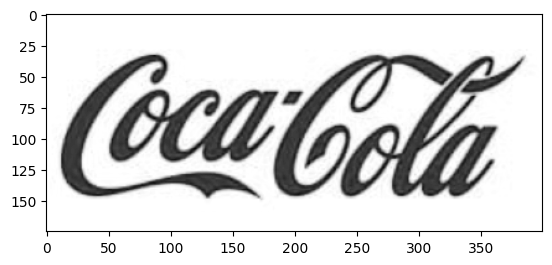

In [229]:
# Levantamos el Template en escala de grises
template = cv.imread('template/pattern.png', cv.IMREAD_GRAYSCALE)
plt.imshow(template, cmap='gray')

In [230]:
lista_nombres = ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']

In [231]:
#Levantamos todas las imagenes que vamos a utilizar
lista_imagenes = []
for name in lista_nombres:
    img = cv.imread('images/'+name)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    lista_imagenes.append(img_rgb)

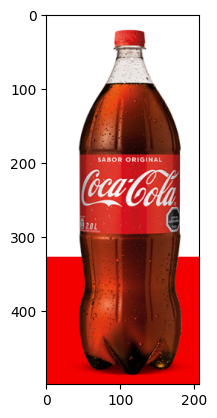

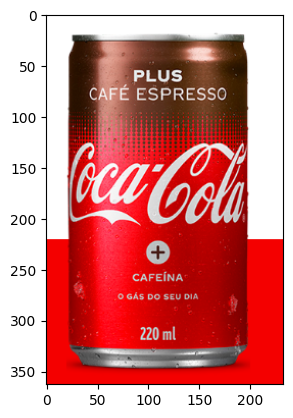

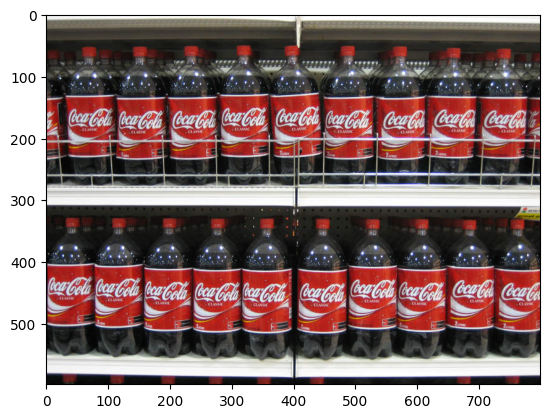

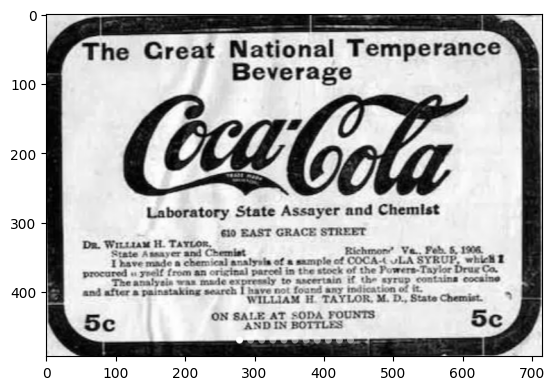

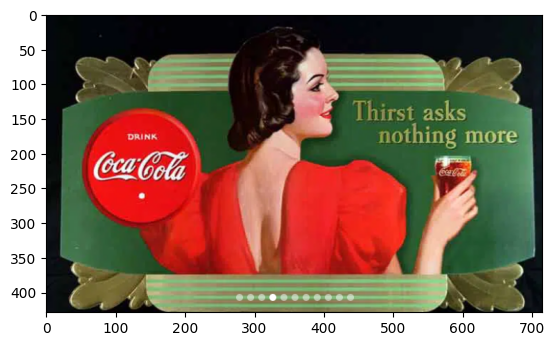

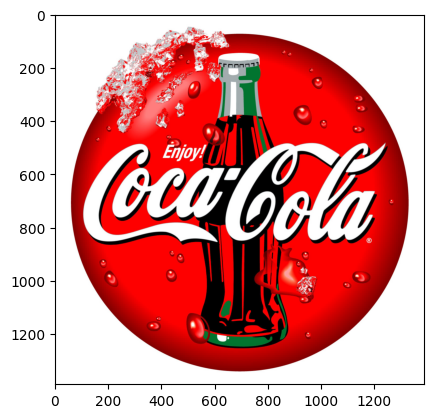

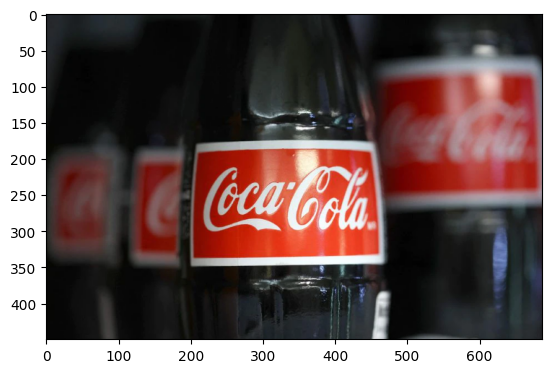

In [232]:
for img in lista_imagenes:
    plt.imshow(img)
    plt.show()

In [233]:
# Paso todas las imagenes a escala de grises
lista_imagenes_gray = []
for img in lista_imagenes:
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    lista_imagenes_gray.append(img_gray)
    

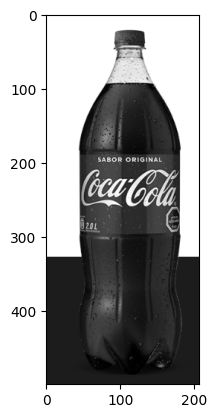

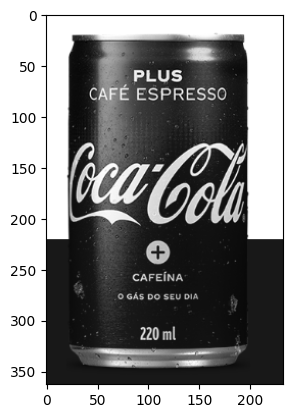

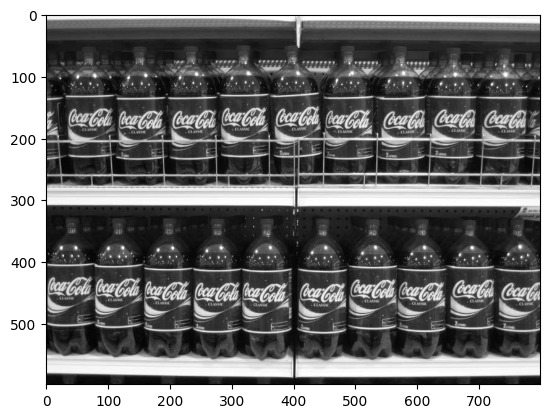

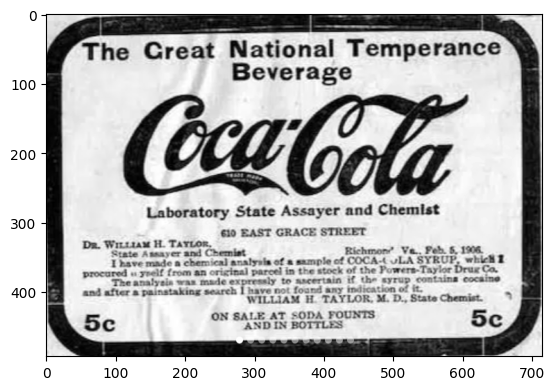

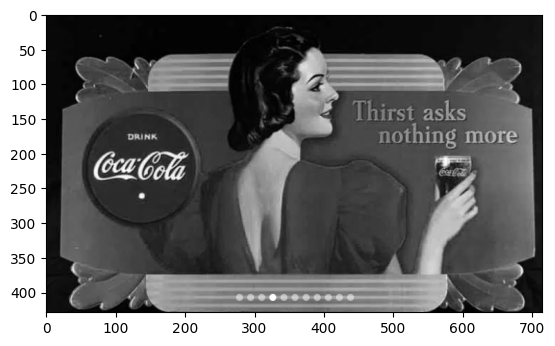

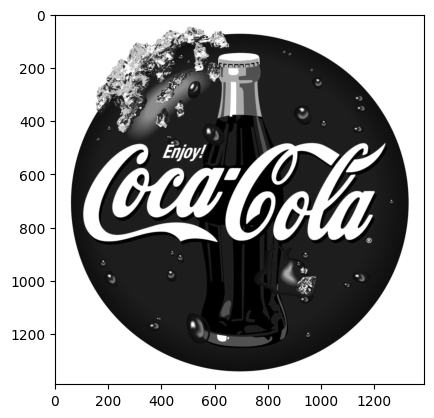

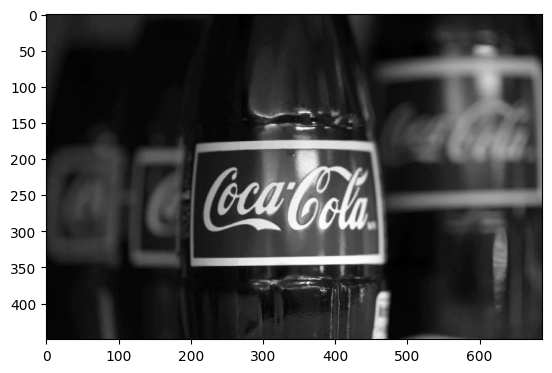

In [234]:
for img in lista_imagenes_gray:
    plt.imshow(img, cmap='gray')
    plt.show()

#### En algunas imagenes vamos a tener que modificamos el template antes de aplicar template matching para que las letras del logo nos queden en blanco

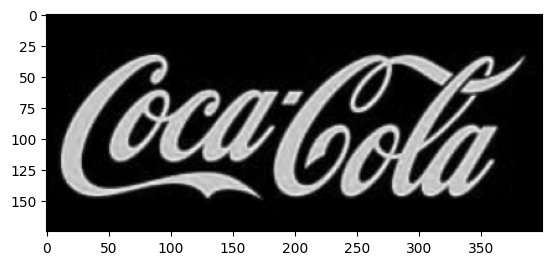

In [235]:
plt.imshow(cv.bitwise_not(template)+75, cmap='gray')

## Detección de 1 logo por cada imagen

#### Para cada detección tenemos que preprocesar el template previamente a aplicar template matching, es decir se analiza caso a caso. 
#### También vamos a evaluar distintos métodos y presentar los que mejor resultados presentan para cada caso.

#### Vamos caso por caso, en cada uno ajustando el tamaño del template:

- coca_logo_1.png

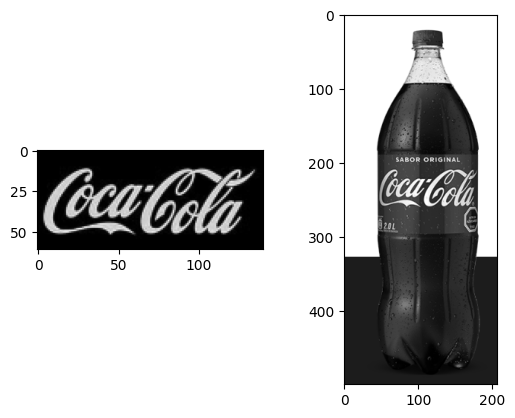

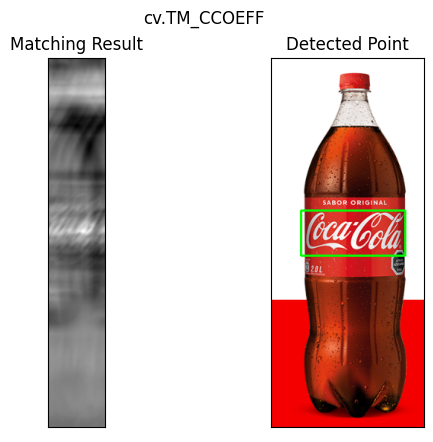

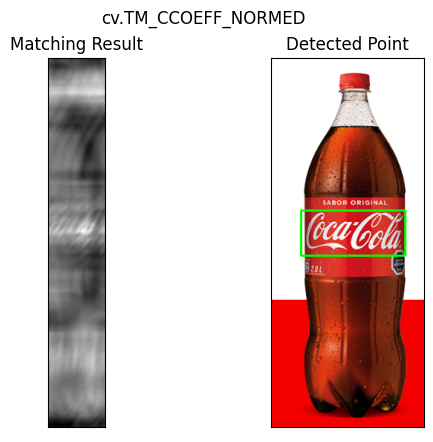

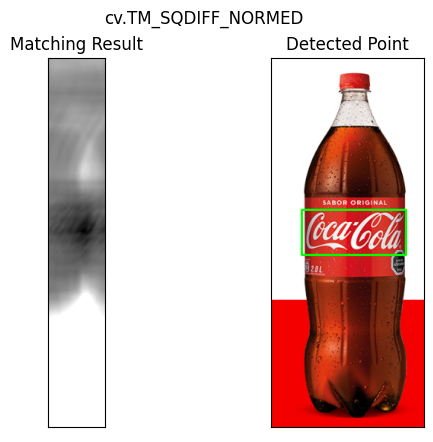

In [236]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 0

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

# Ajustamos el template
resized_template = cv.resize(template, None, fx=0.35, fy=0.35)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

- coca_logo_2.png

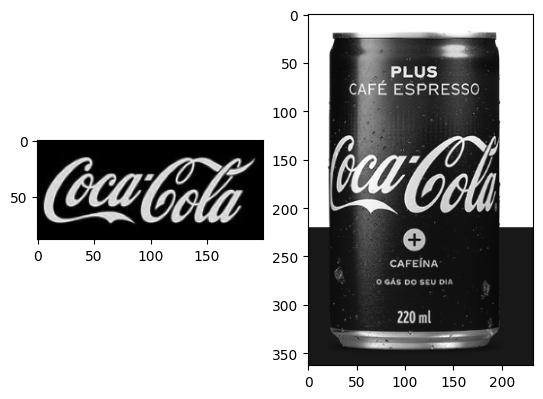

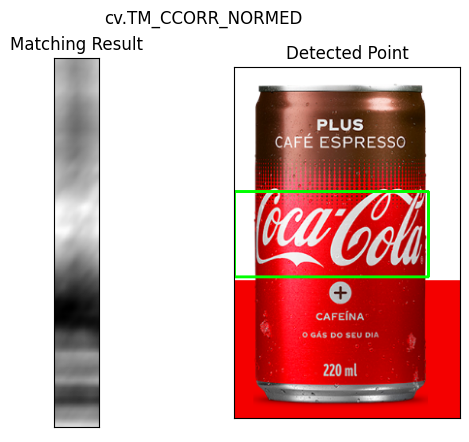

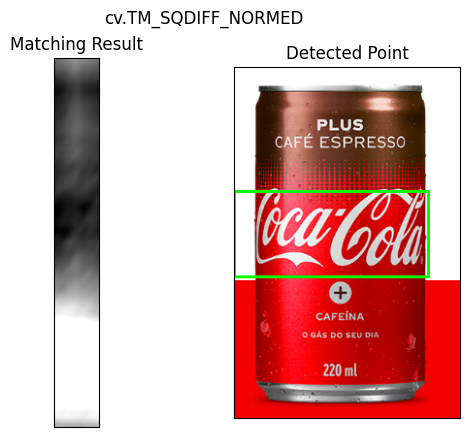

In [237]:
methods = ['cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 1

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.5, fy=0.5)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        # Graficamos el procesamiento y la salida
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

- coca_multi.png

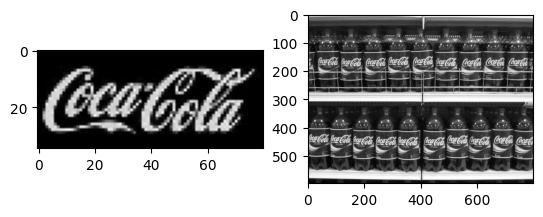

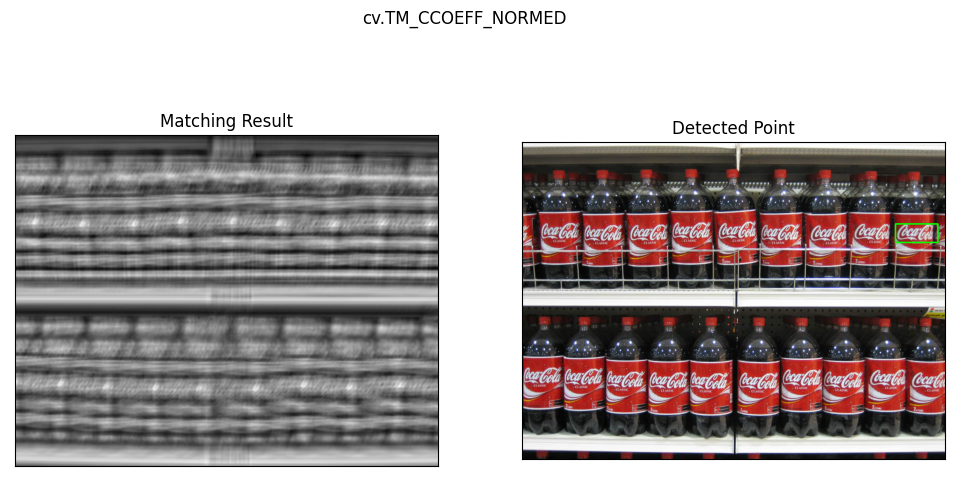

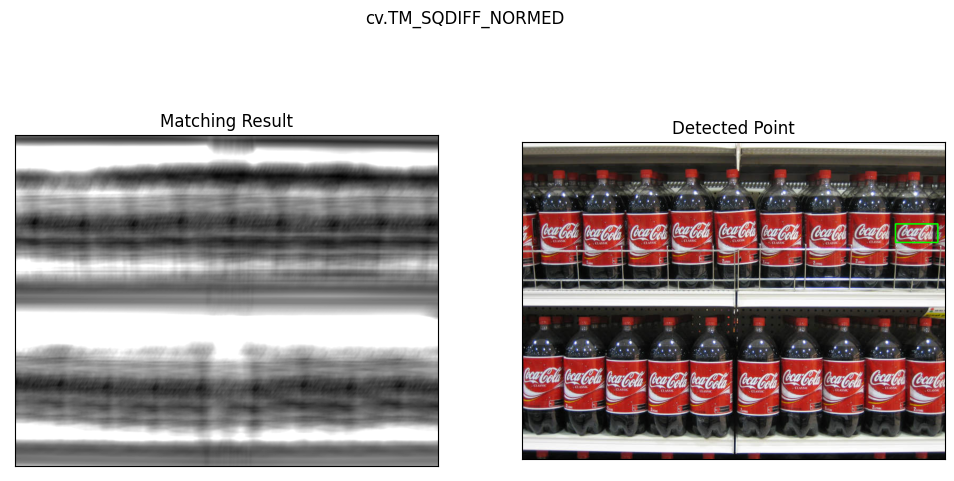

In [238]:
methods = ['cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']

num_imagen = 2

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.2, fy=0.2)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        # Graficamos el procesamiento y la salida
        plt.figure(figsize=(12,6))
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

- coca_retro_1.png

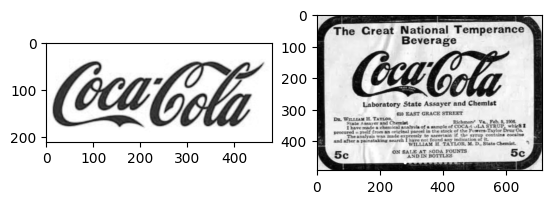

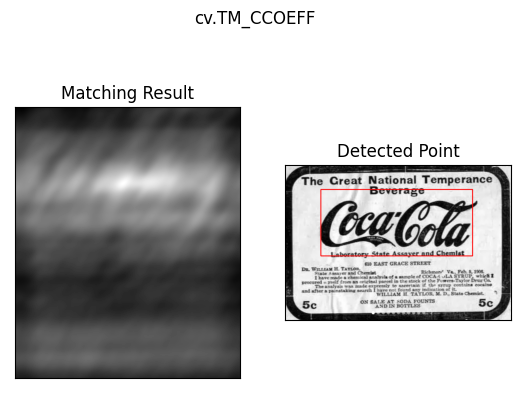

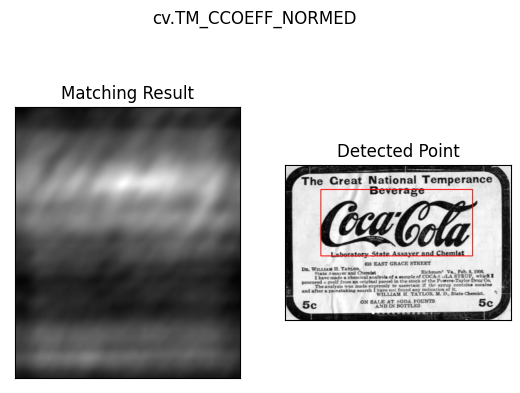

In [239]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED']

num_imagen = 3

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

# Por las características de la imagen usamos el template con letras grises y fondo blanco

resized_template = cv.resize(template, None, fx=1.2, fy=1.2)
temp = resized_template
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, 255, 2)
        
        # Graficamos el procesamiento y la salida
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

- coca_retro_2.png

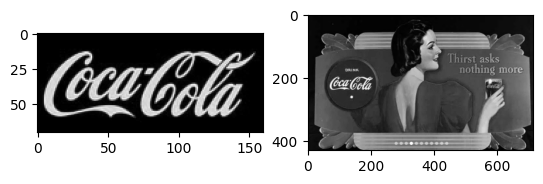

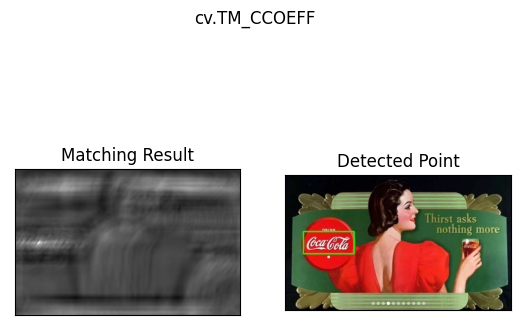

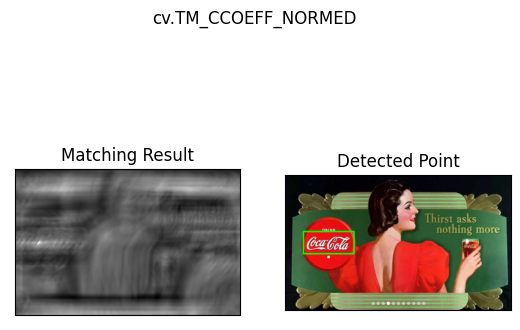

In [240]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED']

num_imagen = 4

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.4, fy=0.4)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 3)
        
        # Graficamos el procesamiento y la salida
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

- COCA-COLA-LOGO.jpg

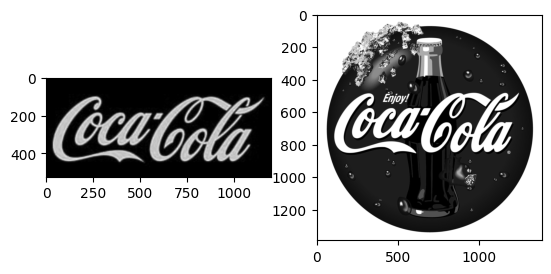

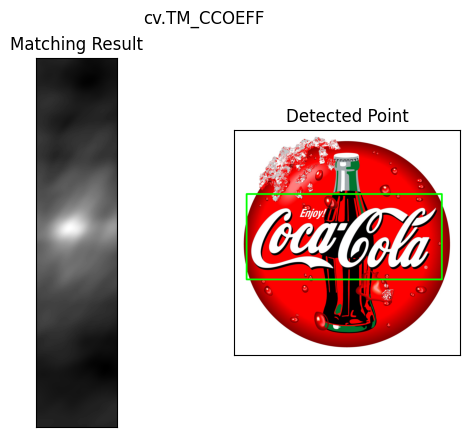

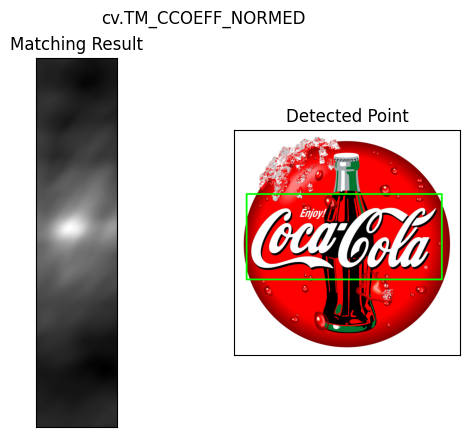

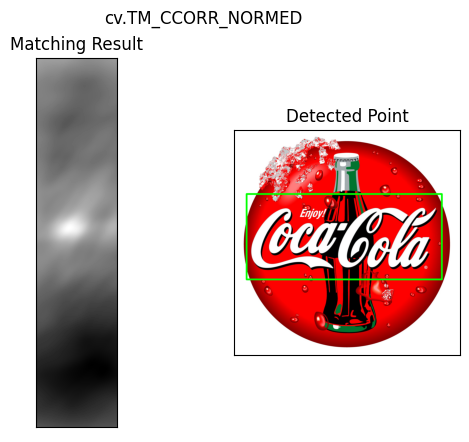

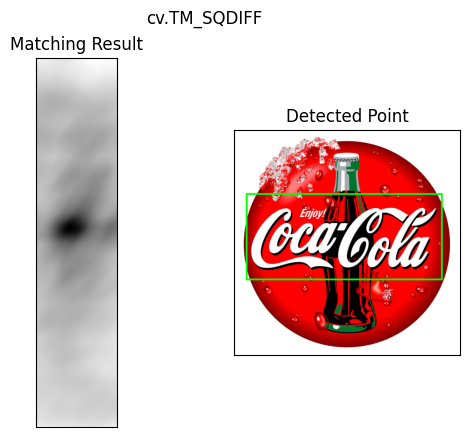

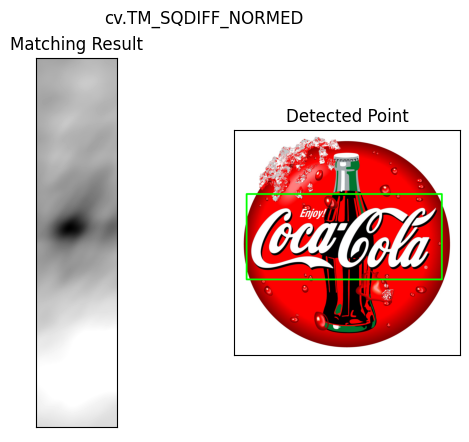

In [241]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 5

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=3, fy=3)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 10)
        
        # Graficamos el procesamiento y la salida
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

- logo_1.png

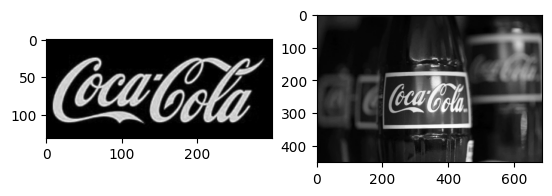

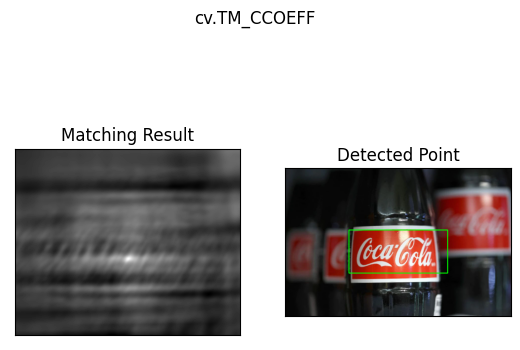

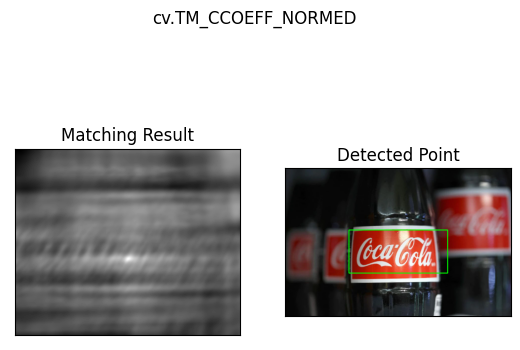

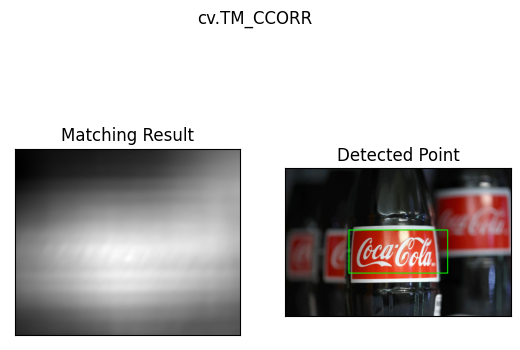

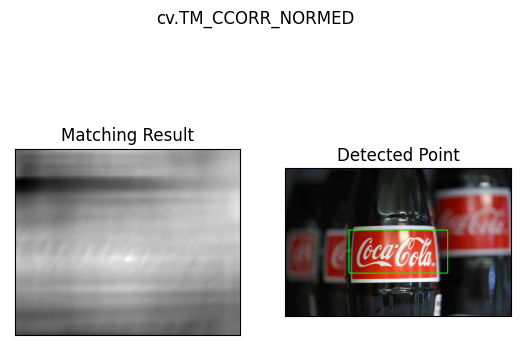

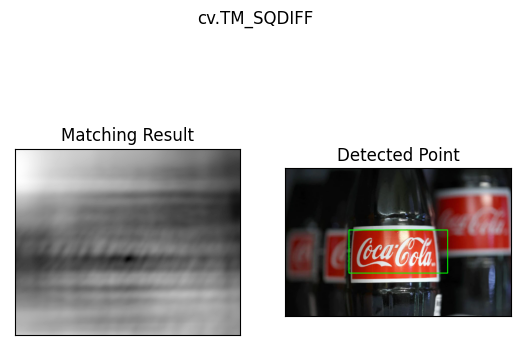

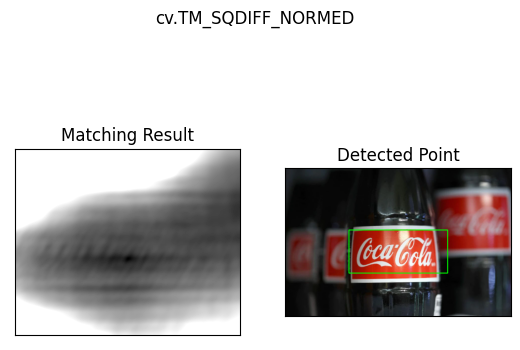

In [242]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

num_imagen = 6

img_rgb = lista_imagenes[num_imagen]
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.75, fy=0.75)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

for meth in methods:
        img_salida = img_rgb.copy()
        method = eval(meth)
        
        res = cv.matchTemplate(img_gray, temp, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        
        # Marcamos el lugar donde lo haya encontrado
        bottom_right = (top_left[0] + w, top_left[1] + h)
        cv.rectangle(img_salida,top_left, bottom_right, (0,255,0), 2)
        
        # Graficamos el procesamiento y la salida
        plt.figure()
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        plt.suptitle(meth)
        plt.show()

## Detecciones Múltiples

### Vamos a realizar detecciones múltiples sobre la imagen coca_multi.png. Probamos los algoritmos que mejor performance tuvieron en la detección anterior.

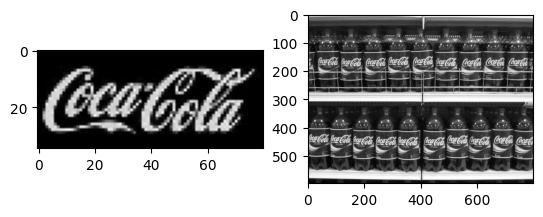

In [243]:
methods = ['cv.TM_CCOEFF_NORMED', 'cv.TM_SQDIFF_NORMED']
num_imagen = 2

img_rgb = lista_imagenes[num_imagen].copy()
img_gray = lista_imagenes_gray[num_imagen]

resized_template = cv.resize(template, None, fx=0.2, fy=0.2)
temp = cv.bitwise_not(resized_template)+75
w, h = resized_template.shape[::-1]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(temp, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')

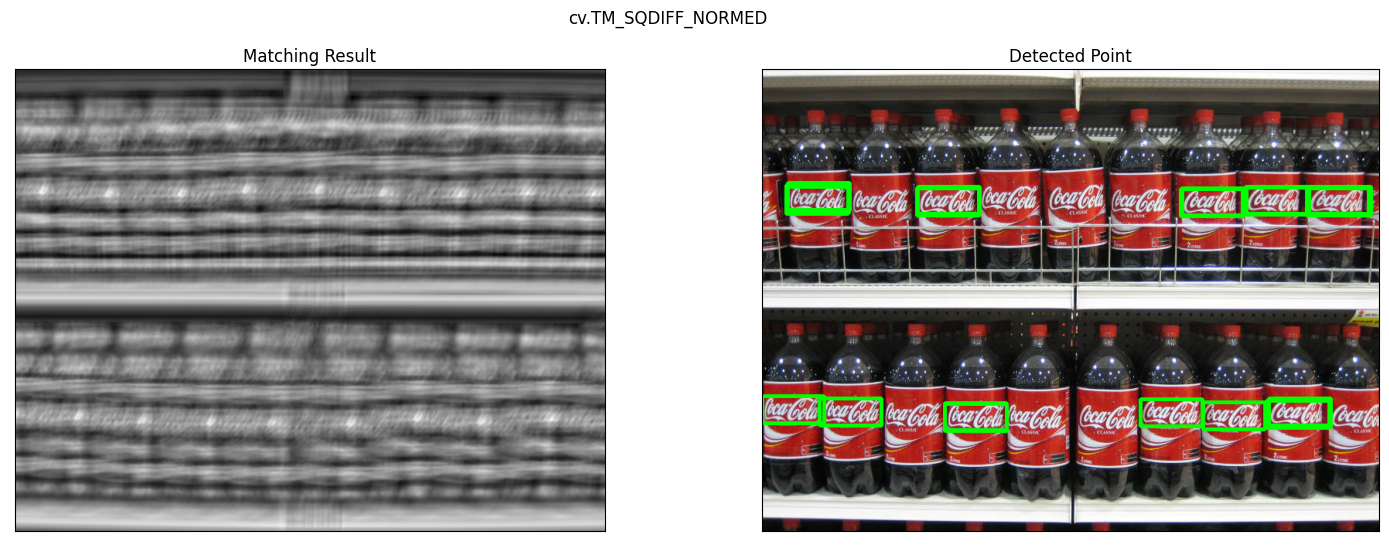

In [244]:
res = cv.matchTemplate(img_gray,temp,cv.TM_CCOEFF_NORMED)

# Fijamos un umbral de "coincidencia"
threshold = 0.38

img_salida = img_rgb.copy()

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), (0,255,0), 3)

plt.figure(figsize=(18,6))
        
# Resultado de coincidencia
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
# Imagen original con recuadros
plt.subplot(122),plt.imshow(img_salida)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
plt.suptitle(meth)
plt.show()

